In [1]:
import random 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
%matplotlib inline
import pandas as pd
cust_df = pd.read_csv("insurance.csv")
cust_df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [2]:
df = cust_df.drop(['smoker','sex','region'], axis=1)
df.head(10)

,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520
5,31,25.740,0,3756.62160
6,46,33.440,1,8240.58960
7,37,27.740,3,7281.50560
8,37,29.830,2,6406.41070
9,60,25.840,0,28923.13692


In [3]:
from sklearn.preprocessing import StandardScaler
X = df.values[:,:]
X = np.nan_to_num(X)
Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet

array([[-1.43876426, -0.45332   , -0.90861367,  0.2985838 ],
       [-1.50996545,  0.5096211 , -0.07876719, -0.95368917],
       [-0.79795355,  0.38330685,  1.58092576, -0.72867467],
       ...,
       [-1.50996545,  1.0148781 , -0.90861367, -0.96159623],
       [-1.29636188, -0.79781341, -0.90861367, -0.93036151],
       [ 1.55168573, -0.26138796, -0.90861367,  1.31105347]])

In [4]:
clusterNum = 2
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(X)
labels = k_means.labels_
print(labels)

[0 0 0 ... 0 0 1]


In [5]:
df["Clus_km"] = labels
df.head(10)

,age,bmi,children,charges,Clus_km
0,19,27.900,0,16884.92400,0
1,18,33.770,1,1725.55230,0
2,28,33.000,3,4449.46200,0
3,33,22.705,0,21984.47061,0
4,32,28.880,0,3866.85520,0
5,31,25.740,0,3756.62160,0
6,46,33.440,1,8240.58960,0
7,37,27.740,3,7281.50560,0
8,37,29.830,2,6406.41070,0
9,60,25.840,0,28923.13692,1


In [6]:
df.groupby('Clus_km').mean()

,age,bmi,children,charges
Clus_km,,,,
0,38.433121,30.217439,1.079163,8364.847548
1,42.765690,32.714059,1.167364,35827.855796


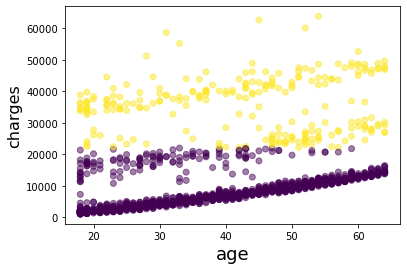

In [7]:
area = np.pi * ( X[:, 1])**2  
plt.scatter(X[:, 0], X[:, -1], c=labels.astype(np.float), alpha=0.5)
plt.xlabel('age', fontsize=18)
plt.ylabel('charges', fontsize=16)

plt.show()

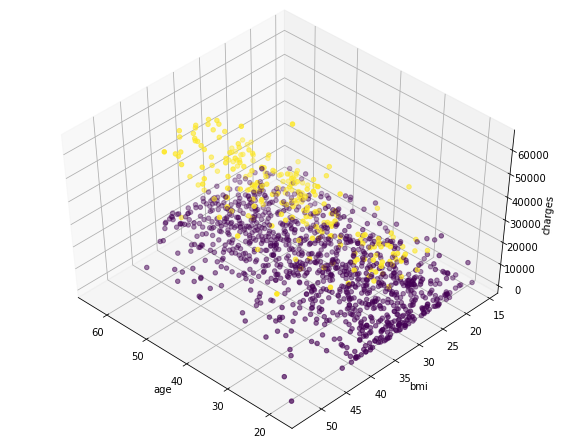

In [8]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
# plt.ylabel('Age', fontsize=18)
# plt.xlabel('Income', fontsize=16)
# plt.zlabel('Education', fontsize=16)
ax.set_xlabel('age')
ax.set_ylabel('bmi')
ax.set_zlabel('charges')

ax.scatter(X[:, 0], X[:, 1], X[:, -1], c= labels.astype(np.float))


In [10]:
from sklearn.metrics import silhouette_score
print(f'Silhouette Score(n=2): {silhouette_score(X, labels)}')

Silhouette Score(n=2): 0.7335568118751502


<function matplotlib.pyplot.show(*args, **kw)>

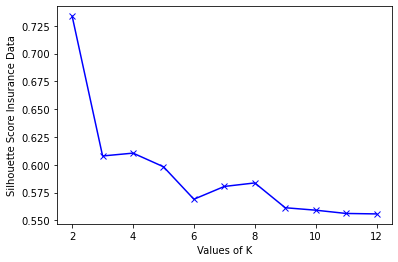

In [16]:
silhouette_data = []
for k in range (2,13):
    kmeans_shihouette = KMeans(init = "k-means++", n_clusters = k, n_init = 12)
    kmeans_shihouette.fit(X)
    shihouette_labels = kmeans_shihouette.labels_
    silhouette_data.append(silhouette_score(X, shihouette_labels))
    
plt.plot(range(2,13), silhouette_data, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Silhouette Score Insurance Data')
plt.show